In [4]:
import math
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

## Ogólny przegląd danych

Additional Information

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

wartości liczbowe atrybutu num:
    -0 brak oznak choroby
    -1,2,3,4 występujące oznaki choroby

In [7]:
# variable information
variable_info = heart_disease.variables
variable_info

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [9]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


## 1.Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?

In [10]:
y_value_counts = y.value_counts()
y_value_counts

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

<Axes: ylabel='num'>

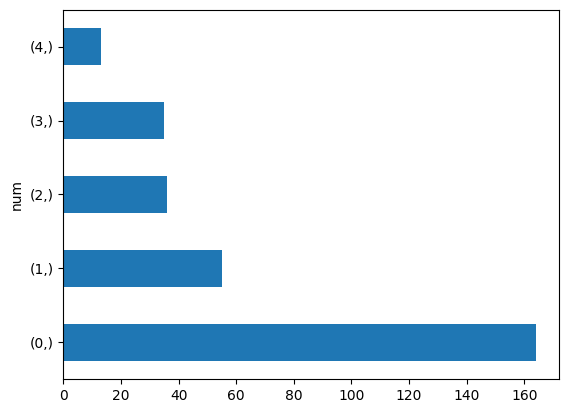

In [11]:
y_value_counts.plot(kind='barh')

<Axes: ylabel='count'>

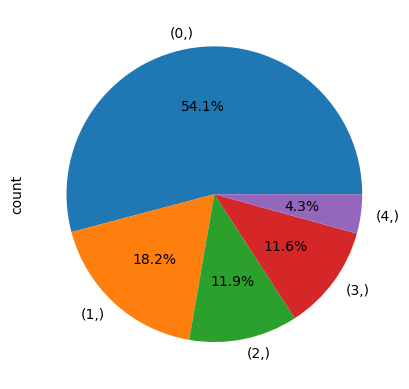

In [12]:
y_value_counts.plot(kind='pie', autopct='%1.1f%%')

Można zauważyć, że najwięcej przypadków jest dla wartości 0, która stanowi ponad połowę wszystkich wartości, jeśli chodzi o pozostałe, przypadek 1 posiada również duży wkład, 2 i 3 mają prawie taką samą częstotliwość na poziomie ok.12%, przypadek 4 jest najmniej liczny i stanowi niecałe 5%.

Odpowiedź:
Zbiór danych nie jest najlepiej zbalansowany, ponieważ niektóre klasy mają znacznie więcej próbek niż inne.

In [13]:
no_presence = y[y==0].count().sum()
presence = y[y!=0].count().sum()
presence,no_presence

(139, 164)

Text(0.5, 1.0, 'Bar Chart: No Presence vs. Presence')

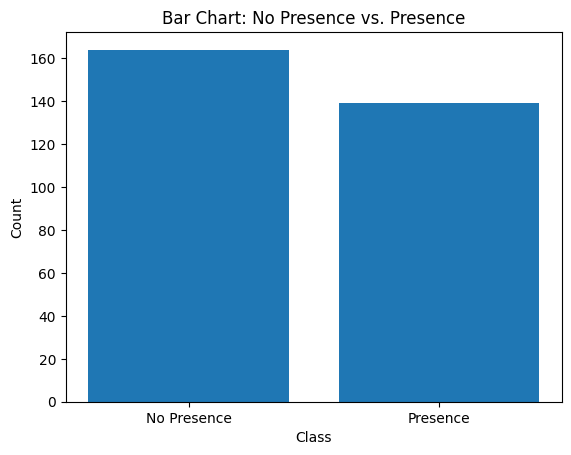

In [14]:
# Create a bar chart
plt.bar(['No Presence', 'Presence'], [no_presence, presence])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart: No Presence vs. Presence')

Text(0.5, 1.0, 'Pie Chart: No Presence vs. Presence')

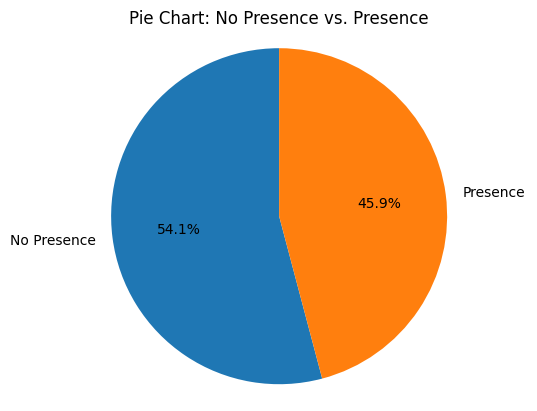

In [15]:
labels = ['No Presence', 'Presence']
sizes = [no_presence, presence]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart: No Presence vs. Presence')

Jeśli jednak pójść dalej i zobaczyć na wartości atrybutu num w perspektywie - 'ma objawy' 'nie ma objawow', rozkład będzie bardziej zbalansowany.

## 2. Jakie są średnie i odchylenia cech liczbowych?

In [16]:
numeric_variables = variable_info[(variable_info['type']=='Integer') & (variable_info['name']!='num')]['name']
numeric_variables

0          age
3     trestbps
4         chol
7      thalach
9      oldpeak
11          ca
Name: name, dtype: object

In [17]:
X[numeric_variables].describe().loc[['mean','std']]

,age,trestbps,chol,thalach,oldpeak,ca
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438


## 3. Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

In [18]:
from scipy import stats

In [19]:
numeric_df = X[numeric_variables]
numeric_df

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0.0
1,67,160,286,108,1.5,3.0
2,67,120,229,129,2.6,2.0
3,37,130,250,187,3.5,0.0
4,41,130,204,172,1.4,0.0
...,...,...,...,...,...,...
298,45,110,264,132,1.2,0.0
299,68,144,193,141,3.4,2.0
300,57,130,131,115,1.2,1.0
301,57,130,236,174,0.0,1.0


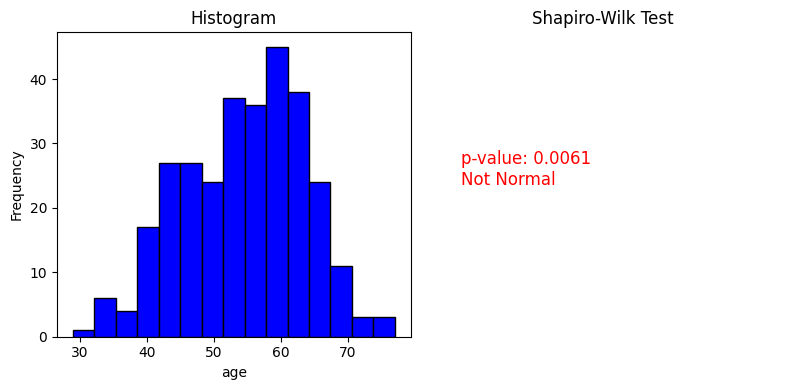

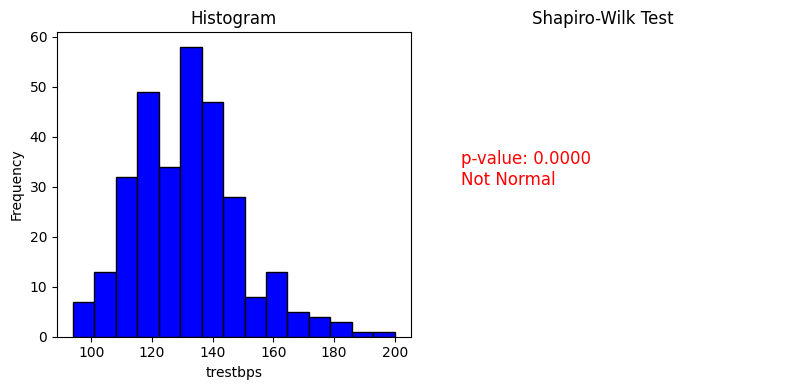

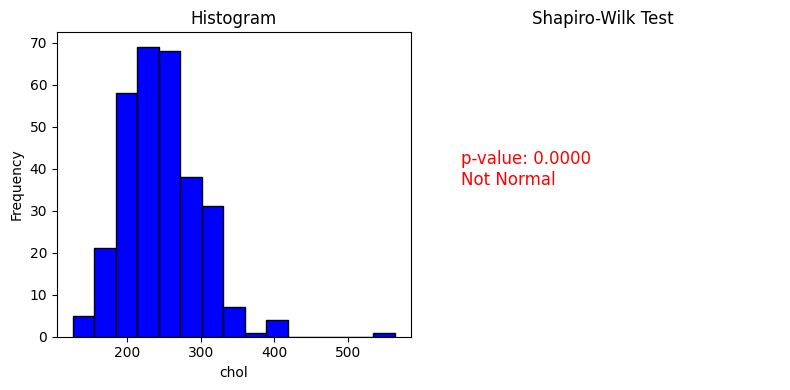

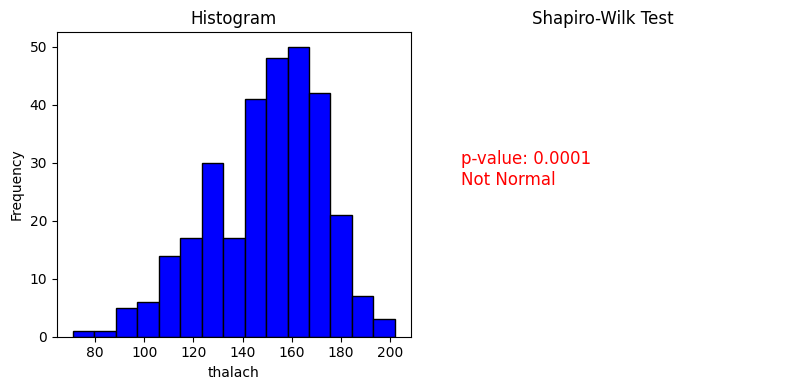

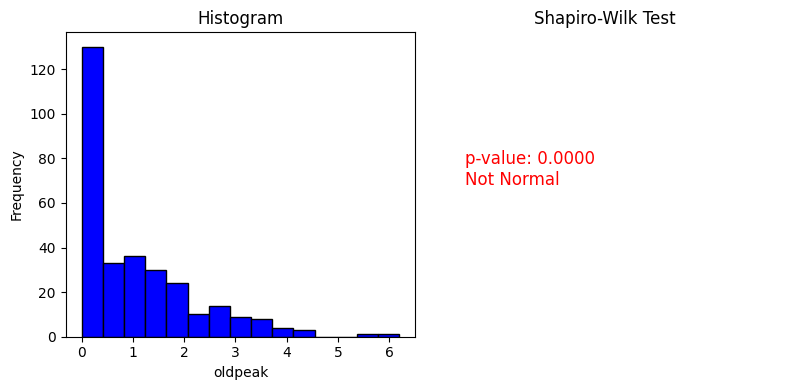

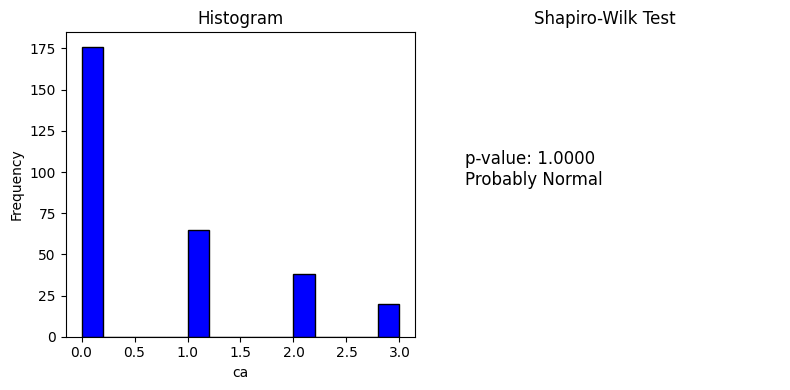

In [20]:
# Perform the Shapiro-Wilk test and create histograms for each attribute
for column in numeric_df.columns:
    # Shapiro-Wilk test
    p_value = stats.shapiro(numeric_df[column])[1]

    # Create a histogram
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(numeric_df[column], bins=15, color='blue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')

    # Check normality based on p-value
    plt.subplot(1, 2, 2)
    if p_value > 0.05:
        plt.text(0.1, 0.5, f'p-value: {p_value:.4f}\nProbably Normal', fontsize=12)
    else:
        plt.text(0.1, 0.5, f'p-value: {p_value:.4f}\nNot Normal', fontsize=12, color='red')
    plt.axis('off')
    plt.title('Shapiro-Wilk Test')

    plt.tight_layout()
    plt.show()

In [21]:
import statsmodels.api as sm

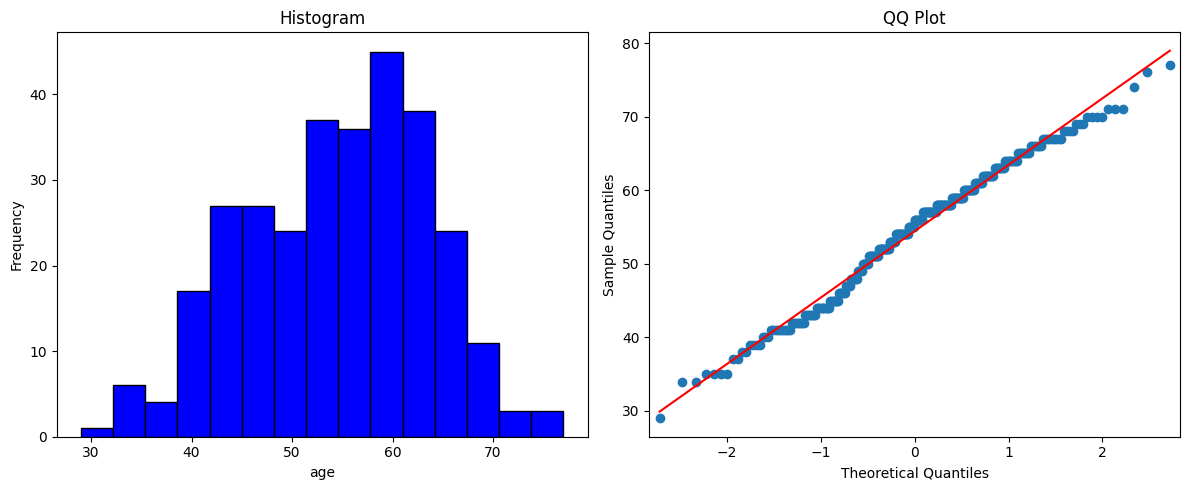

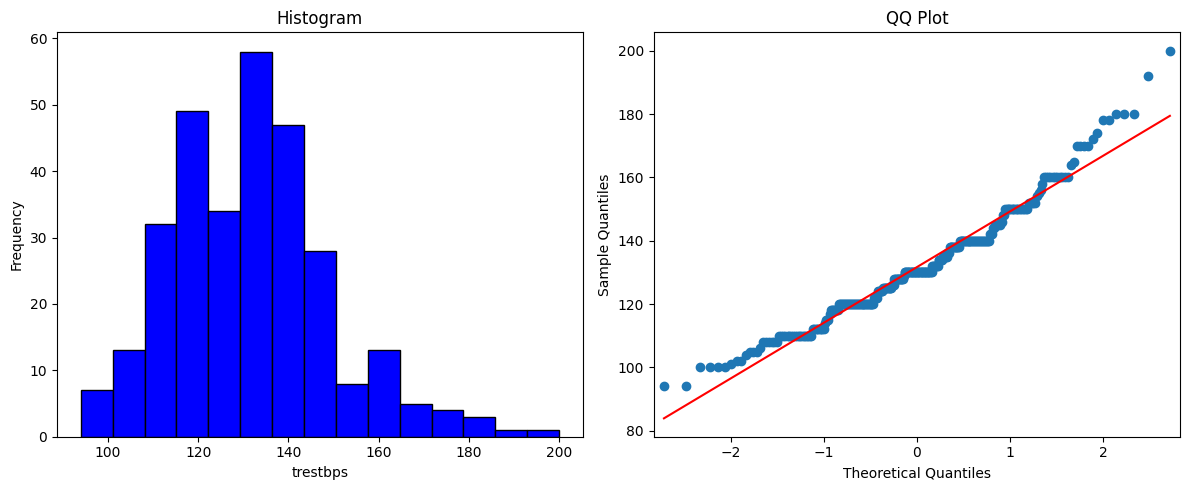

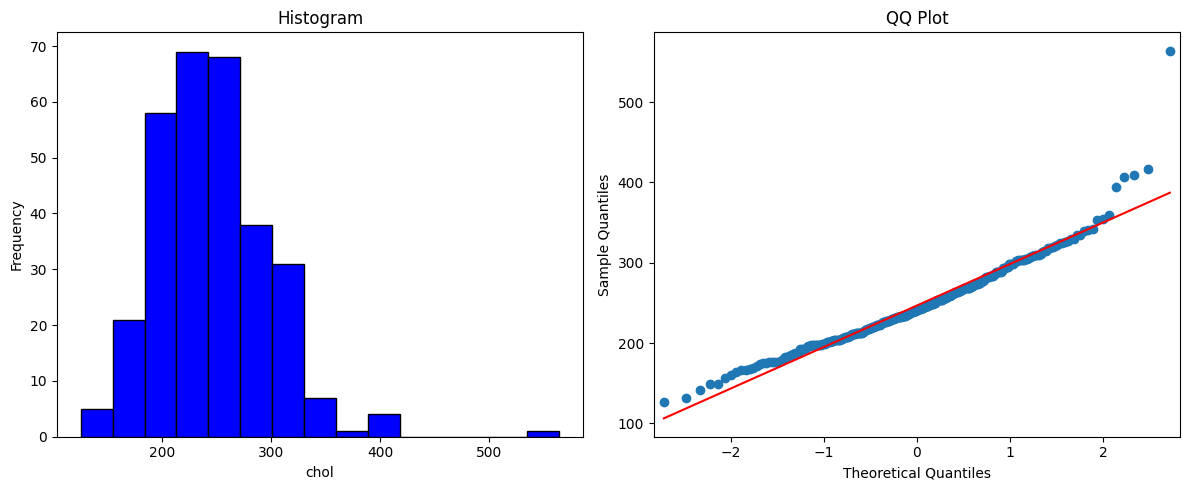

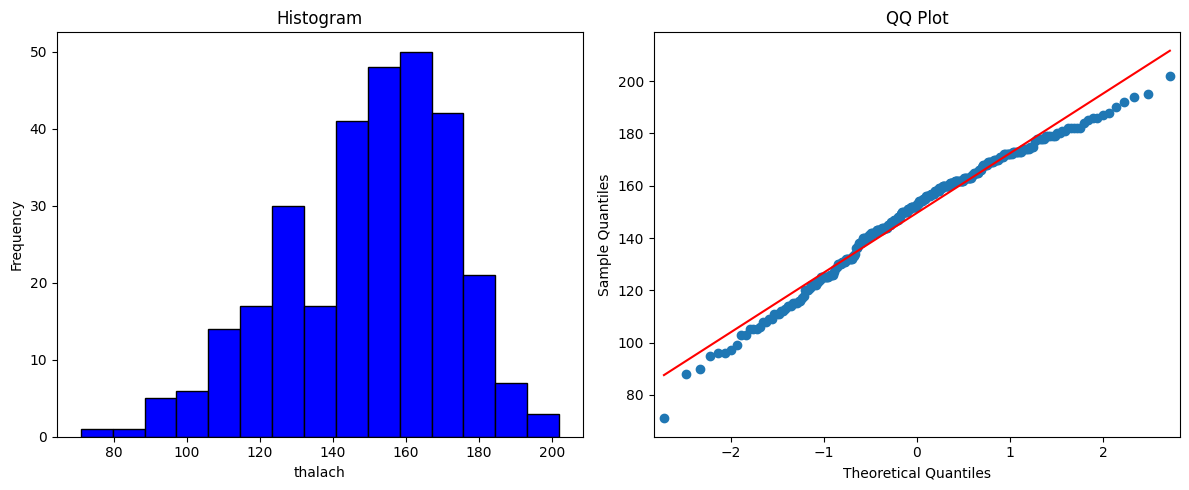

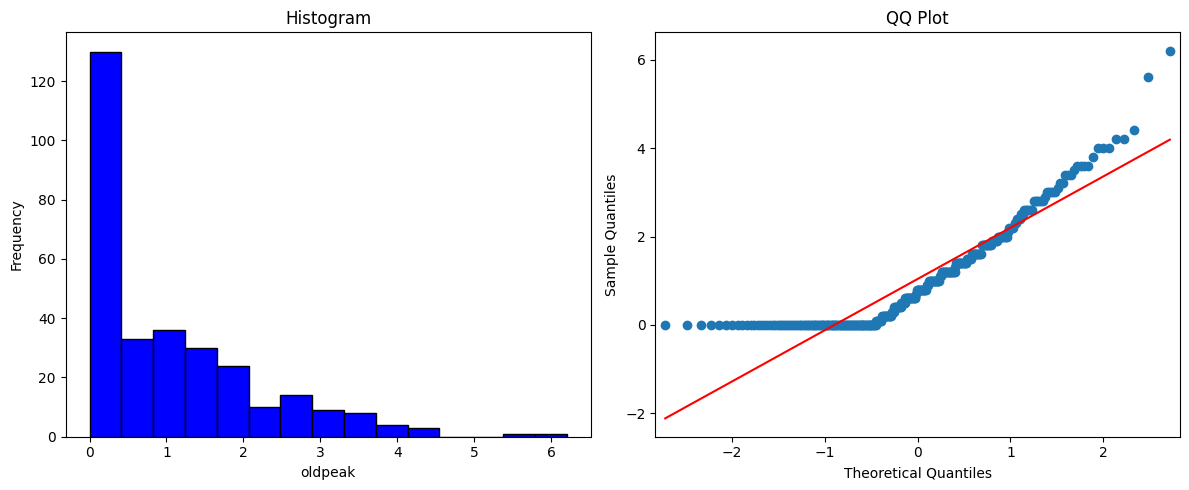

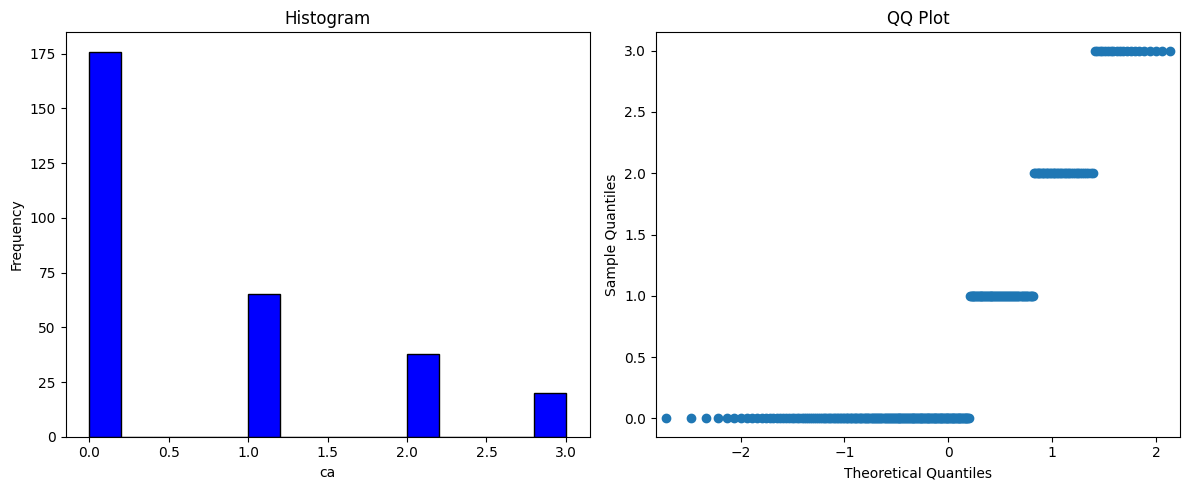

In [22]:
num_bins = 15

# Iterate through each column and create histograms and QQ plots
for column in numeric_df.columns:
    # Create a figure with subplots (histogram and QQ plot)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Create a histogram
    ax1.hist(numeric_df[column], bins=num_bins, color='blue', edgecolor='black')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram')

    # Create a QQ plot for the transformed data
    sm.qqplot(numeric_df[column], line='s', ax=ax2)
    ax2.set_title('QQ Plot')

    plt.tight_layout()
    plt.show()


Badając te kwestię postanowiłem sprawdzić najpierw testem Shapiro-Wilka, czy wartości są rozdystrybuowane w sposób normalny, jednak patrząc na histogramy danych i wyniki testu postanowiłem sprawdzić czy dane są w 'przybliżeniu' rozdystrybuowane w sposób normalny, więc postanowiłem sprawdzić mniej restrykcyjnym testem. Wykres kwantylowy (qqplot). Można z tego wyciągnąć, że atrybuty:
- thalach
- chol
- age

mają rozkład podobny do normalnego.

## 4. Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

In [23]:
categorical_variables = variable_info[(variable_info['type']=='Categorical')]['name']
categorical_variables

1         sex
2          cp
5         fbs
6     restecg
8       exang
10      slope
12       thal
Name: name, dtype: object

In [24]:
categorical_df = X[categorical_variables]
categorical_df

,sex,cp,fbs,restecg,exang,slope,thal
0,1,1,1,2,0,3,6.0
1,1,4,0,2,1,2,3.0
2,1,4,0,2,1,2,7.0
3,1,3,0,0,0,3,3.0
4,0,2,0,2,0,1,3.0
...,...,...,...,...,...,...,...
298,1,1,0,0,0,2,7.0
299,1,4,1,0,0,2,7.0
300,1,4,0,0,1,2,7.0
301,0,2,0,2,0,2,3.0


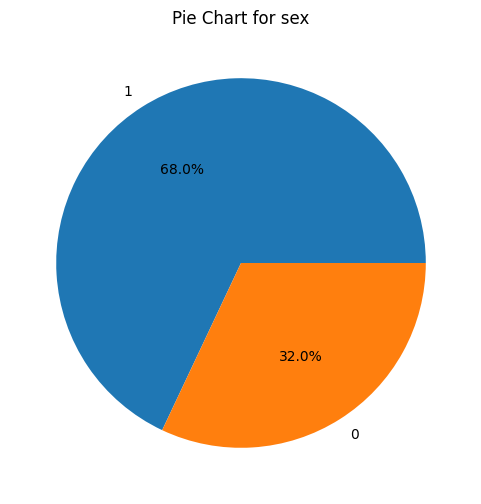

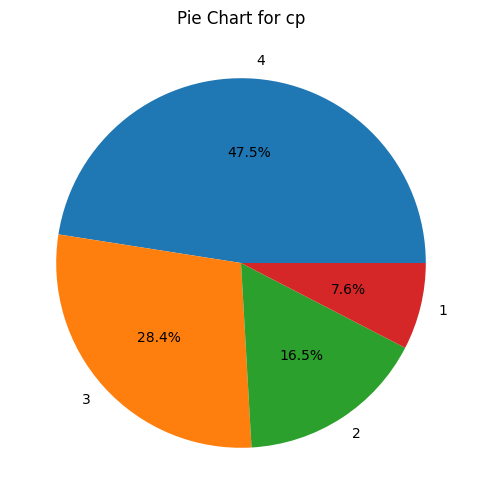

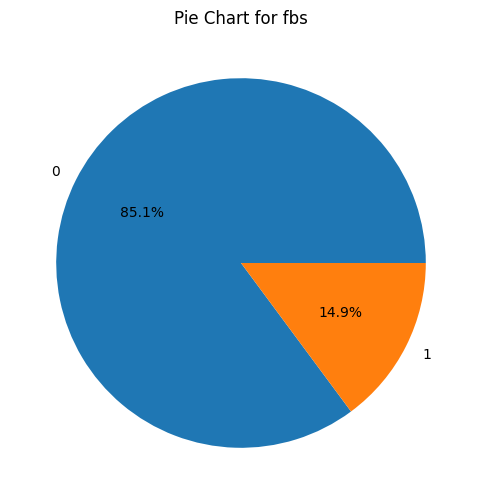

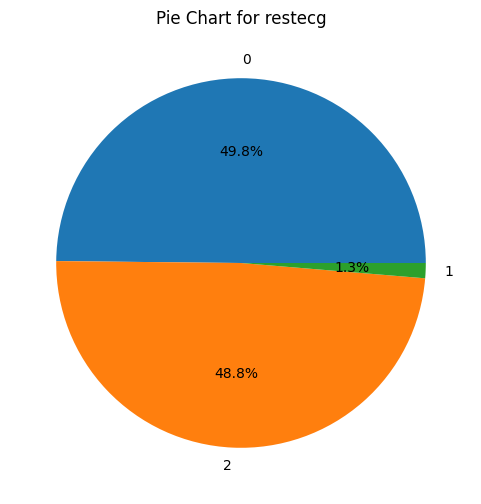

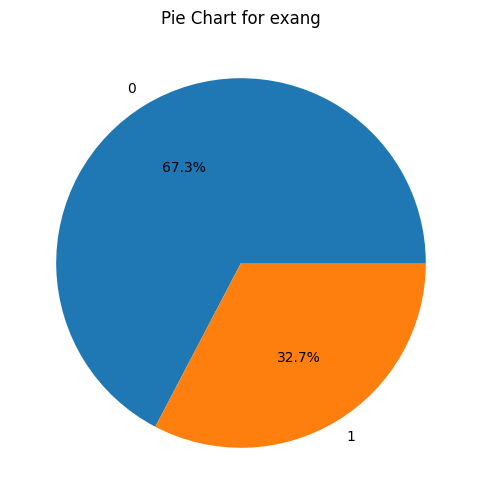

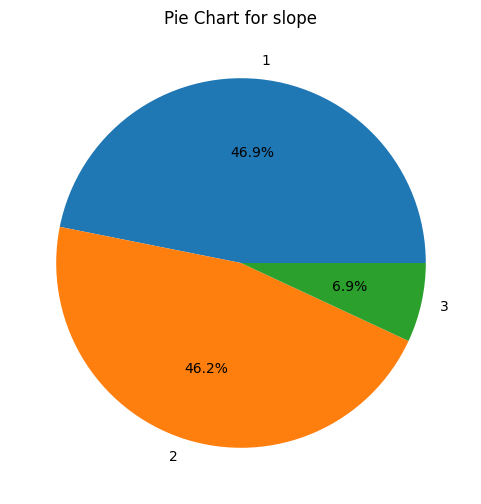

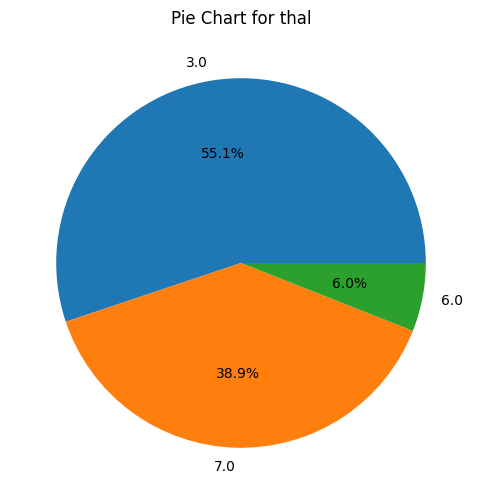

In [25]:
for column in categorical_df.columns:
    plt.figure(figsize=(6, 6))
    categorical_df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()

Rozkład wartości atrybutów kategorycznych jest różny, w większości przypadków nierównomierny, zależnie od atrybutu.
w niektórych przypadkach jest spora dysproporcja w danych, ale przeważnie dla jednego z 3 przypadków.
np. **thal,slope,restec**
W przypadku **sex, fbs** znacznie przeważa jedna kategoria.
Najbardziej równomierny jest zbiór **cp**


## 5. Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?

In [26]:
X.isnull().sum().sort_values(ascending=False)

ca          4
thal        2
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64

In [27]:
y.isnull().sum()

num    0
dtype: int64

W przypadku **ca** uzupełnię brakujące wartości średnią. Ponieważ jest to wartość numeryczna. W przypadku **thal** uzupełnię je modą, ponieważ jest to atrybut kategoryczny.

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [29]:
most_frequent_number_of_v = X['ca'].mode().iloc[0]
X.loc[:, 'ca'] = X['ca'].fillna(most_frequent_number_of_v)
most_frequent_category = X['thal'].mode().iloc[0]
X.loc[:, 'thal'] = X['thal'].fillna(most_frequent_category)
X.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## 6. kod przekształcający dane do macierzy cech liczbowych (przykłady × cechy).

In [30]:
df = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'],
                              prefix=['cp', 'restecg', 'slope', 'thal']).astype('int64')
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1,3,0,...,1,0,0,1,0,1,0,1,0,0
2,67,1,120,229,0,129,1,2,2,0,...,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3,0,0,...,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
299,68,1,144,193,1,141,0,3,2,0,...,1,1,0,0,0,1,0,0,0,1
300,57,1,130,131,0,115,1,1,1,0,...,1,1,0,0,0,1,0,0,0,1
301,57,0,130,236,0,174,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0


# Lab02 Prosta klasyfikacja


In [31]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [32]:
# y = y.map(lambda x: 1 if x in (1,2,3,4) else 0)
# y

# Export przeanalizowanych i uzupelnionych plikow do csv

In [33]:
from pathlib import Path

In [34]:
csv_X_path = Path('../Dataset/X.csv')
csv_y_path = Path('../Dataset/y.csv')

In [35]:
X.to_csv(csv_X_path,index=False)
y.to_csv(csv_y_path,index=False)